## Preparar nanopartículas

In [70]:
import hyperspy.api as hs
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2


In [28]:
destino = r"C:\Users\PC\Hackathon\Cropped images_spectra"

In [120]:
path = r"C:\Users\PC\Hackathon\Selected images_spectra\Selected images_spectra\0028-20241022_HAADF_115_kx HAADF.dm4"

In [135]:
%matplotlib qt

image = hs.load(path)
matrix = image.data
plt.imshow(matrix,cmap="gray")
plt.show()

In [127]:
matrixcrop = matrix[460:880,430:850]
plt.imshow(matrixcrop,cmap="gray")

In [128]:
image_crop = Image.fromarray(matrixcrop)

In [129]:
n = 14

In [130]:
image_crop.save(destino + "/" + f"image{n}.png")

In [79]:
image_ = Image.open(destino + "/" + f"image{n}.png")
image_ = np.array(image_)
image_r = cv2.resize(image_,(128,128), interpolation = cv2.INTER_LINEAR)

In [80]:
plt.imshow(image_r)
plt.show()

In [131]:
import os

In [132]:
n_destino = r"C:\Users\PC\Hackathon\Cropped 128"

In [134]:
for file in os.listdir(destino):
    A = Image.open(destino + "/"+ file)
    A = np.array(A)
    B = cv2.resize(A, (128,128), interpolation = cv2.INTER_LINEAR)
    C = Image.fromarray(B)
    C.save(n_destino + "/" + file)

## Preparar background

In [398]:
path = r"C:\Users\PC\Hackathon\Selected images_spectra\Selected images_spectra\8.dm4"

In [334]:
destino = r"C:\Users\PC\Hackathon\backgroundbis"

In [400]:
image = hs.load(path)
matrix = image.data[724:,400:700]
plt.imshow(matrix,cmap="gray")
plt.show()

In [164]:
k=69
for i in range(0,3):
    for j in range(0,10):
        k+=1
        A = matrix[j*100:j*100+100,i*100:i*100+100]
        B = cv2.resize(A,(32,32), interpolation=cv2.INTER_LINEAR)
        C = Image.fromarray(B)
        C.save(destino + "/" + f"background_{k}.png")

In [401]:
k=19
B = cv2.resize(matrix,(32,32), interpolation=cv2.INTER_LINEAR)
C = Image.fromarray(B)
C.save(destino + "/" + f"background_{k}.png")

## Labelear

In [210]:
path = r"C:\Users\PC\Hackathon\Cropped 128"

In [211]:
destino = r"C:\Users\PC\Hackathon\Labels"

In [262]:
image = Image.open(path + f"/image{n}.png")
plt.imshow(image,cmap="gray")
plt.show()

In [261]:
n = 14
puntos = [[50,53]]

In [263]:
A = np.zeros((128,128))
for p in puntos:
    a = p[0]
    b = p[1]
    print(a,b)
    A[a,b]=1
B = Image.fromarray(np.uint8(A*255))
B.save(destino + "/" + f"label_{n}.png")

50 53


## Formar las imágenes con nano 

In [264]:
import numpy as np
from PIL import Image
import random

In [440]:
def normalize(matrix):     
    minim = np.amin(matrix)
    maxim = np.amax(matrix)
    if(minim != maxim):
       normalize_matrix = (matrix - minim) / (maxim - minim)
    elif(maxim != 0):
       normalize_matrix = matrix/maxim
    else:
       normalize_matrix = matrix
   
    return normalize_matrix

In [564]:
def crear_imagen_compuesta(path_imagen_128, path_label_128, imagenes_32):
    
    # creamos el lienzo
    lienzo = np.zeros((256,256))
    lienzo_label = np.zeros((256,256))
    
    # cojemos la imagen 
    imagen_128 = np.asarray(Image.open(path_imagen_128))
    label_128 = np.asarray(Image.open(path_label_128))
    
    # llenamos el lienzo de ruido
    for i in range(0, 8): 
        for j in range(0, 8): 
                imagen_32 = random.choice(imagenes_32)
                background = np.asarray(Image.open(imagen_32))
                #m = np.mean(imagen_128)
                # background = cv2.resize(background,(64,64),interpolation=cv2.INTER_LINEAR)
                lienzo[i*32:(i+1)*32, j*32:(j+1)*32] = background#*m
    
    # delimitamos los límites
    max_x = random.randint(0, 4)
    max_y = random.randint(0, 4)
    pos_x = max_x*32
    pos_y = max_y*32
    
    lienzo[pos_y:pos_y+128, pos_x:pos_x+128] = imagen_128
    lienzo_label[pos_y:pos_y+128, pos_x:pos_x+128] = label_128
    
    return lienzo, lienzo_label

In [556]:
path_imagenes = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\nps"
path_background = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\bckg"
path_label = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\labels"

In [513]:
n = 0

imagenes_32 = [os.path.join(path_background, archivo) for archivo in os.listdir(path_background)]

lienzo, lienzo_label = crear_imagen_compuesta(path_imagenes + "/" + f"nano_{n}.png", path_label + "/" + f"label_{n}.png",imagenes_32)


plt.imshow(lienzo)
plt.show()



In [450]:
imagen_final

array([[   1.19521912,    7.03851262,   18.59229748, ...,   13.63636364,
          12.12121212,   11.36363636],
       [   1.46082337,    6.10889774,   15.53784861, ...,   17.8030303 ,
          15.53030303,   14.39393939],
       [   1.85922975,    4.38247012,    9.29614874, ...,   25.75757576,
          22.34848485,   20.83333333],
       ...,
       [ 973.        , 1078.        , 1065.        , ...,   31.88637089,
          27.06670922,   24.67283754],
       [ 923.        ,  998.        ,  859.        , ...,   23.26843281,
          39.57867858,   47.71784232],
       [1102.        ,  854.        , 1044.        , ...,   18.95946377,
          45.80274497,   59.24034472]])

In [557]:
destino_i = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\imagenes\imagenes"
destino_l = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\imagenes\labels"

In [565]:
imagenes_32 = [os.path.join(path_background, archivo) for archivo in os.listdir(path_background)]
k = 0

for i in range(1,3):
    for j in range(0,40):
        lienzo, lienzo_label = crear_imagen_compuesta(path_imagenes + "/" + f"n{i}.png", path_label + "/" + f"l{i}.png",imagenes_32)
        lienzo = normalize(lienzo)
        lienzo = Image.fromarray(np.uint8(lienzo*255))
        lienzo_label = Image.fromarray(np.uint8(lienzo_label*255))
        lienzo.save(destino_i + "/" + f"imagen_{k}.png")
        lienzo_label.save(destino_l + "/" + f"label_{k}.png") 
        k+=1

In [532]:
A = Image.open(destino_i + "/" + "imagen_130.png")
B = Image.open(destino_l + "/" + "label_130.png")

In [535]:
%matplotlib qt

plt.imshow(A)
plt.show()

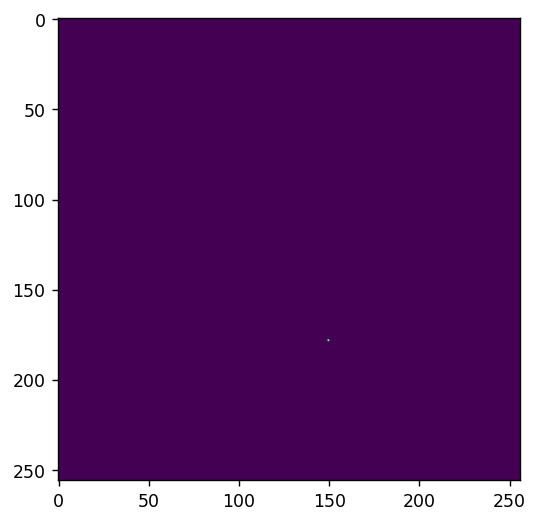

In [534]:
%matplotlib inline

plt.imshow(B)
plt.show()

In [573]:
path = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\imagenes\labels"
new_path = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\imagenes\labels_con_ruido"

In [574]:
import shutil

for file in os.listdir(path):
    for j in range(0,8):
        nombre = new_path + "/" + file[:-4] + f"_n{j}.png"
        shutil.copy(path + "/" + file, nombre)

In [546]:
A = Image.open(r"C:\Users\PC\Hackathon\imagenes\imagenes_con_ruido" + "/" + "imagen_130_n1.png")
B = Image.open(r"C:\Users\PC\Hackathon\imagenes\labels_con_ruido" + "/" + "label_130_n5.png")

In [545]:
%matplotlib qt

plt.imshow(A)
plt.show()

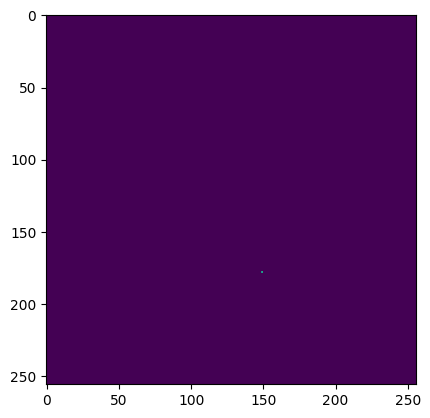

In [547]:
%matplotlib inline

plt.imshow(B)
plt.show()

## Imágenes solo backgrounds

In [570]:
def crear_imagen_background(imagenes_32): #el argumento de las imágenes para las otras es necesario
    
    # creamos el lienzo
    lienzo = np.zeros((256,256))
    
    # cojemos la imagen 
    #imagen_128 = np.asarray(Image.open(path_imagen_128))
    
    # llenamos el lienzo de ruido
    for i in range(0, 8): 
        for j in range(0, 8): 
                imagen_32 = random.choice(imagenes_32)
                background = np.asarray(Image.open(imagen_32))
                #m = np.mean(imagen_128)
                lienzo[i*32:(i+1)*32, j*32:(j+1)*32] = background#*m cuidado con las de jovan se normaliza
    
    return lienzo

In [566]:
path_background = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\bckg"

In [567]:
destino_r = r"C:\Users\PC\Documents\GitHub\Hackathon-2024-GAeN\Ivan\imagenes\background"

In [571]:
imagenes_32 = [os.path.join(path_background, archivo) for archivo in os.listdir(path_background)]
k = 0

for i in range(1,3):
    for j in range(0,35):
        lienzo = crear_imagen_background(imagenes_32)
        lienzo = normalize(lienzo)
        lienzo = Image.fromarray(np.uint8(lienzo*255))
        lienzo.save(destino_r + "/" + f"background_{k}.png")
        k+=1
